In [15]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from itertools import islice

from torch import nn
from torch.nn import functional as F

import importlib
import sys 
import getpass
import matplotlib as mpl

sys.path.append('/home/luca_ltpn/DL-Fleuret/Proj_308427_348143_XXXXXX')
sys.path.append('/home/luca_ltpn/DL-Fleuret')
from Miniproject_1.model import *

In [16]:
font_size   = 20
letter_size = 22
label_size  = 25
title_font  = 28
legend_size = 23

mpl.rc('font', family='serif', size=font_size)
mpl.rc('text', usetex=True)

mpl.rcParams['lines.linewidth']     = 2
mpl.rcParams['axes.labelsize']      = label_size
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['xtick.major.size']    = 4
mpl.rcParams['xtick.minor.size']    = 2
mpl.rcParams['xtick.major.width']   = 1.1
mpl.rcParams['xtick.minor.width']   = 0.55
mpl.rcParams['xtick.direction']     = 'out'
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.major.size']    = 6
mpl.rcParams['ytick.minor.size']    = 3
mpl.rcParams['ytick.major.width']   = 1.1
mpl.rcParams['ytick.minor.width']   = 0.55
mpl.rcParams['ytick.direction']     = 'out'
mpl.rcParams['legend.fontsize']     = legend_size
mpl.rcParams['axes.formatter.limits'] = -5, 5


class MyLocator(mpl.ticker.AutoMinorLocator):
    def __init__(self, n=2):
        super().__init__(n=n)
mpl.ticker.AutoMinorLocator = MyLocator

marker_sz  = 8
location   ='upper left'
properties ={'size':12}
width_plot = 8
reduced_labels = 0.7*label_size

def get_axis_limits(ax, scalex=.1, scaley=.85):
    return (ax.get_xlim()[0] + (ax.get_xlim()[1]-ax.get_xlim()[0])*scalex, ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*scaley)

In [2]:
valid_in, valid_tg = torch.load('/home/luca_ltpn/DL-Fleuret/val_data.pkl') #validation set (noise-clean)
train_in, train_tg = torch.load('/home/luca_ltpn/DL-Fleuret/train_data.pkl') #test set (noise-noise)

train_in_clean = valid_in[:500]#.float()/ 255.
train_tg_clean = valid_tg[:500]#.float()/ 255. 

valid_in = valid_in[500:]#.float()/ 255.
valid_tg = valid_tg[500:].float()/ 255.

train_in = train_in[:500]#.float()/ 255.
train_tg = train_tg[:500]#.float()/ 255.

In [3]:
mod = Model()

mod.num_epochs = 300
mod.batch_size = 16
mod.eta        = 1e3
mod.momentum   = 0.
mod.weight_decay = 0.

mod.train_and_validate(train_in, train_tg, valid_in, valid_tg, filename='noise2noise_N=500.txt')

In [4]:
mod = Model()

mod.num_epochs = 300
mod.batch_size = 16
mod.eta        = 1e3
mod.momentum   = 0.
mod.weight_decay = 0.

mod.train_and_validate(train_in_clean, train_tg_clean,\
                       valid_in, valid_tg, filename='noise2clean_N=500.txt')

In [9]:
img  = np.loadtxt('noise2noise_N=500.txt')[:,0]
psnr = np.loadtxt('noise2noise_N=500.txt')[:,-1]

img_clean  = np.loadtxt('noise2clean_N=500.txt')[:,0]
psnr_clean = np.loadtxt('noise2clean_N=500.txt')[:,-1]

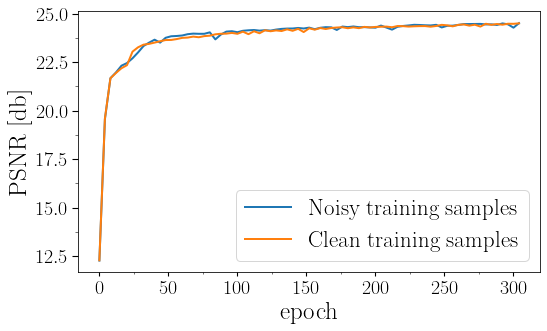

In [20]:
fig, ax = plt.subplots(1,1, sharey=True, sharex=True, figsize=(width_plot,5))

ax.plot(img/500, psnr, label="Noisy training samples")
ax.plot(img_clean/500, psnr_clean, label="Clean training samples")

#ax.set_ylim(18,)
#ax.set_xscale("log")
ax.set_xlabel("epoch")
ax.set_ylabel("PSNR [db]")
ax.legend();

fig.tight_layout()
#fig.savefig("noise2clean.pdf")